## Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services - Book1

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [74]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

**Note:**

I worked on my computer because the classroom environment was too slow.
Because of the size of the azdias dataset, I downloaded it in two halves, which I concatenated.  I verified that the size of the resulting dataset is correct.

I confirm that the data will be deleted after this project is accepted.

In [75]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
customers = pd.read_csv('project_customers.csv', low_memory=False)

In [76]:
customers.drop(['Unnamed: 0'], axis=1, inplace=True)
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,NaN,NaN,NaN,NaN,10.0,1.0,...,2.0,6.0,9.0,7.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,9628,-1,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,0.0,9.0,NaN,3,FOOD,SINGLE_BUYER,0,1,4
2,143872,-1,1.0,6.0,NaN,NaN,NaN,NaN,0.0,1.0,...,11.0,6.0,9.0,2.0,3,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,143873,1,1.0,8.0,NaN,NaN,NaN,NaN,8.0,0.0,...,2.0,NaN,9.0,7.0,1,COSMETIC,MULTI_BUYER,0,1,4
4,143874,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,7.0,...,4.0,2.0,9.0,3.0,1,FOOD,MULTI_BUYER,0,1,3


In [77]:
customers.shape

(191652, 369)

In [78]:
azdias1 = pd.read_csv('project_azdias1.csv', low_memory=False)

In [79]:
azdias1.drop(['Unnamed: 0'], axis=1, inplace=True)
azdias1.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,910215,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2
1,910220,-1,9.0,0.0,NaN,NaN,NaN,NaN,21.0,11.0,...,4.0,8.0,11.0,10.0,3.0,9.0,4.0,5,2,1
2,910225,-1,9.0,17.0,NaN,NaN,NaN,NaN,17.0,10.0,...,2.0,9.0,9.0,6.0,3.0,9.0,2.0,5,2,3
3,910226,2,1.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,...,0.0,7.0,10.0,11.0,NaN,9.0,7.0,3,2,4
4,910241,-1,1.0,20.0,NaN,NaN,NaN,NaN,14.0,3.0,...,2.0,3.0,5.0,4.0,2.0,9.0,3.0,4,1,3


In [80]:
azdias2 = pd.read_csv('project_azdias2.csv', low_memory=False)

In [81]:
azdias2.drop(['Unnamed: 0'], axis=1, inplace=True)
azdias2.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,876730,2,1.0,12.0,NaN,NaN,NaN,NaN,12.0,6.0,...,3.0,6.0,3.0,2.0,6.0,9.0,1.0,2,2,4
1,876741,-1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,35.0,...,4.0,10.0,13.0,10.0,6.0,9.0,5.0,4,2,1
2,876743,-1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,60.0,...,2.0,10.0,13.0,10.0,3.0,9.0,2.0,4,2,2
3,876744,-1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,8.0,...,2.0,9.0,11.0,8.0,4.0,9.0,1.0,4,1,2
4,876747,0,9.0,12.0,NaN,NaN,NaN,NaN,12.0,2.0,...,3.0,7.0,8.0,5.0,6.0,9.0,3.0,3,2,3


In [82]:
#concatenate the two parts of azdias
azdias = pd.concat([azdias1, azdias2], axis=0)

In [83]:
print(azdias.shape)
print(customers.shape)

(891221, 366)
(191652, 369)


In [84]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 0 to 391220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


In [85]:
azdias.columns

Index(['LNR', 'AGER_TYP', 'AKT_DAT_KL', 'ALTER_HH', 'ALTER_KIND1',
       'ALTER_KIND2', 'ALTER_KIND3', 'ALTER_KIND4', 'ALTERSKATEGORIE_FEIN',
       'ANZ_HAUSHALTE_AKTIV',
       ...
       'VHN', 'VK_DHT4A', 'VK_DISTANZ', 'VK_ZG11', 'W_KEIT_KIND_HH',
       'WOHNDAUER_2008', 'WOHNLAGE', 'ZABEOTYP', 'ANREDE_KZ',
       'ALTERSKATEGORIE_GROB'],
      dtype='object', length=366)

In [86]:
azdias.select_dtypes(include=['object'])

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,D19_LETZTER_KAUF_BRANCHE,EINGEFUEGT_AM,OST_WEST_KZ
0,NaN,NaN,NaN,NaN,NaN,NaN
1,8A,8.0,51.0,NaN,1992-02-10 00:00:00,W
2,4C,4.0,24.0,D19_UNBEKANNT,1992-02-12 00:00:00,W
3,2A,2.0,12.0,D19_UNBEKANNT,1997-04-21 00:00:00,W
4,6B,6.0,43.0,D19_SCHUHE,1992-02-12 00:00:00,W
...,...,...,...,...,...,...
391216,7A,7.0,41.0,D19_HAUS_DEKO,1992-02-10 00:00:00,W
391217,9D,9.0,51.0,D19_UNBEKANNT,1992-02-10 00:00:00,W
391218,4C,4.0,24.0,D19_BEKLEIDUNG_GEH,1992-02-10 00:00:00,W
391219,9D,9.0,51.0,D19_UNBEKANNT,1992-02-12 00:00:00,W


**Reviewing the non-numeric features**
  * CAMEO_DEU_2015 and CAMEO_DEUG_2015 are categorical features that can be handled with replaced with dummy variables (standard `get_dummy()` techniques).
  * CAMEO_INTL_2015 is a two-level variable that will be transformed below before the "dummy" treatment.
  * EINGEFUEGT_AM is a time stamp, of which the year will be extracted as an integer.
  * D19_LETZTER_KAUF_BRANCHE is an oddball, with values as descrptive  strings instead of codes. We could dummy it as is, but the results (column headings ) are messy. Instead, we will convert the categories to numbers and keep the keys in a dictionary.
  

In [87]:
# Dealing with D19_LETZTER_KAUF_BRANCHE'
print(azdias['D19_LETZTER_KAUF_BRANCHE'].nunique())
codes = azdias['D19_LETZTER_KAUF_BRANCHE'].unique()
print(codes)

35
[nan 'D19_UNBEKANNT' 'D19_SCHUHE' 'D19_ENERGIE' 'D19_KOSMETIK'
 'D19_VOLLSORTIMENT' 'D19_SONSTIGE' 'D19_BANKEN_GROSS'
 'D19_DROGERIEARTIKEL' 'D19_HANDWERK' 'D19_BUCH_CD' 'D19_VERSICHERUNGEN'
 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BANKEN_DIREKT' 'D19_BANKEN_REST'
 'D19_FREIZEIT' 'D19_LEBENSMITTEL' 'D19_HAUS_DEKO' 'D19_BEKLEIDUNG_REST'
 'D19_SAMMELARTIKEL' 'D19_TELKO_MOBILE' 'D19_REISEN' 'D19_BEKLEIDUNG_GEH'
 'D19_TECHNIK' 'D19_NAHRUNGSERGAENZUNG' 'D19_DIGIT_SERV' 'D19_LOTTO'
 'D19_RATGEBER' 'D19_TIERARTIKEL' 'D19_KINDERARTIKEL' 'D19_BIO_OEKO'
 'D19_WEIN_FEINKOST' 'D19_GARTEN' 'D19_BILDUNG' 'D19_BANKEN_LOKAL']


In [88]:
# Replace strings with numbers and keep the conversion in a dictionary
LETZTER_KB_codes = list(codes[1:])
LETZTER_KB_dict = {}
i = 0
for item in LETZTER_KB_codes:
    LETZTER_KB_dict[item] = i
    i +=1
LETZTER_KB_dict['D19_UNBEKANNT'] = np.NaN # by definition

In [89]:
print(list(LETZTER_KB_dict.keys()))

['D19_UNBEKANNT', 'D19_SCHUHE', 'D19_ENERGIE', 'D19_KOSMETIK', 'D19_VOLLSORTIMENT', 'D19_SONSTIGE', 'D19_BANKEN_GROSS', 'D19_DROGERIEARTIKEL', 'D19_HANDWERK', 'D19_BUCH_CD', 'D19_VERSICHERUNGEN', 'D19_VERSAND_REST', 'D19_TELKO_REST', 'D19_BANKEN_DIREKT', 'D19_BANKEN_REST', 'D19_FREIZEIT', 'D19_LEBENSMITTEL', 'D19_HAUS_DEKO', 'D19_BEKLEIDUNG_REST', 'D19_SAMMELARTIKEL', 'D19_TELKO_MOBILE', 'D19_REISEN', 'D19_BEKLEIDUNG_GEH', 'D19_TECHNIK', 'D19_NAHRUNGSERGAENZUNG', 'D19_DIGIT_SERV', 'D19_LOTTO', 'D19_RATGEBER', 'D19_TIERARTIKEL', 'D19_KINDERARTIKEL', 'D19_BIO_OEKO', 'D19_WEIN_FEINKOST', 'D19_GARTEN', 'D19_BILDUNG', 'D19_BANKEN_LOKAL']


In [90]:
# update the D19_LETZTER_KAUF_BRANCHE' column
for key in LETZTER_KB_dict.keys():
     azdias['D19_LETZTER_KAUF_BRANCHE'] = azdias['D19_LETZTER_KAUF_BRANCHE'].replace(key, LETZTER_KB_dict[key])
#check    
print(azdias['D19_LETZTER_KAUF_BRANCHE'])                          

0          NaN
1          NaN
2          NaN
3          NaN
4          1.0
          ... 
391216    17.0
391217     NaN
391218    22.0
391219     NaN
391220     NaN
Name: D19_LETZTER_KAUF_BRANCHE, Length: 891221, dtype: float64


In [91]:
# pick the year in 'EINGEFUEGT_AM'.
temp = azdias['EINGEFUEGT_AM'].str.split('-')
temp_np = np.array(temp)
year = []
for item in temp_np:
    try:
        year.append(int(item[0]))
    except:
        year.append(np.NaN)
azdias['EINGEFUEGT_AM'] = year
#check
print(azdias.loc[:,'EINGEFUEGT_AM'])

0            NaN
1         1992.0
2         1992.0
3         1997.0
4         1992.0
           ...  
391216    1992.0
391217    1992.0
391218    1992.0
391219    1992.0
391220    1992.0
Name: EINGEFUEGT_AM, Length: 891221, dtype: float64


In [92]:
# assess missing values
n_records = azdias.shape[0]
n_features = azdias.shape[1]
missing_count = 0

print('Feature', 20*(' '), 'Missing data   Percent')
for n in range (0, n_features):
    col = azdias.columns[n]
    ms = azdias.iloc[:, n].isnull().sum()
    if ms !=0:
        missing_count +=1
        print('{:30s}  {:8d}    {:.1f}'.format(azdias.columns[n], ms, ms/n_records*100))
        
print('\nNumber of features with missing values: ', missing_count)

Feature                      Missing data   Percent
AKT_DAT_KL                         73499    8.2
ALTER_HH                           73499    8.2
ALTER_KIND1                       810163    90.9
ALTER_KIND2                       861722    96.7
ALTER_KIND3                       885051    99.3
ALTER_KIND4                       890016    99.9
ALTERSKATEGORIE_FEIN              262947    29.5
ANZ_HAUSHALTE_AKTIV                93148    10.5
ANZ_HH_TITEL                       97008    10.9
ANZ_KINDER                         73499    8.2
ANZ_PERSONEN                       73499    8.2
ANZ_STATISTISCHE_HAUSHALTE         93148    10.5
ANZ_TITEL                          73499    8.2
ARBEIT                             97216    10.9
BALLRAUM                           93740    10.5
CAMEO_DEU_2015                     98979    11.1
CAMEO_DEUG_2015                    98979    11.1
CAMEO_INTL_2015                    98979    11.1
CJT_GESAMTTYP                       4854    0.5
CJT_KATALOGNUTZER      

KBA13_MAZDA                       105800    11.9
KBA13_MERCEDES                    105800    11.9
KBA13_MOTOR                       105800    11.9
KBA13_NISSAN                      105800    11.9
KBA13_OPEL                        105800    11.9
KBA13_PEUGEOT                     105800    11.9
KBA13_RENAULT                     105800    11.9
KBA13_SEG_GELAENDEWAGEN           105800    11.9
KBA13_SEG_GROSSRAUMVANS           105800    11.9
KBA13_SEG_KLEINST                 105800    11.9
KBA13_SEG_KLEINWAGEN              105800    11.9
KBA13_SEG_KOMPAKTKLASSE           105800    11.9
KBA13_SEG_MINIVANS                105800    11.9
KBA13_SEG_MINIWAGEN               105800    11.9
KBA13_SEG_MITTELKLASSE            105800    11.9
KBA13_SEG_OBEREMITTELKLASSE       105800    11.9
KBA13_SEG_OBERKLASSE              105800    11.9
KBA13_SEG_SONSTIGE                105800    11.9
KBA13_SEG_SPORTWAGEN              105800    11.9
KBA13_SEG_UTILITIES               105800    11.9
KBA13_SEG_VAN       

In [93]:
def show_missing_data(df, cutoff):
    '''
    This function displays the percent amount of missing data in df
    INPUT:
    df - a dataframe
    cutoff - reference level for missing data e.g., 25.0 (float)
    
    OUTPUT:
    missing_df - dataframe with index = df.columns exceeding cutoff, and value = % amount missing data
    '''
    n_rows = df.shape[0]
    missing_cols = df.isna().sum()[df.isna().sum() > 0]
    missing_dict = {'missing_pct': np.round(missing_cols/n_rows*100)}

    missing_df = pd.DataFrame(data=missing_dict, index=missing_cols.index)
    missing_df.sort_values(by='missing_pct', ascending=False, inplace=True)
       
    return missing_df[missing_df['missing_pct'] > cutoff]                                                      

In [94]:
# look for features above the 25% cutoff
nas_25 = show_missing_data(azdias, 25)
print('Top 10 features with more than 25% missing data (descending)')
nas_25.head(10)

Top 10 features with more than 25% missing data (descending)


,missing_pct
ALTER_KIND4,100.0
ALTER_KIND3,99.0
ALTER_KIND2,97.0
ALTER_KIND1,91.0
EXTSEL992,73.0
KK_KUNDENTYP,66.0
D19_LETZTER_KAUF_BRANCHE,51.0
ALTERSKATEGORIE_FEIN,30.0
D19_SOZIALES,29.0
D19_LOTTO,29.0


In [95]:
# For use subsequently
# record columns with few nans
nas_5 = show_missing_data(azdias, 5)
print('Top 10 features with more than 5% missing data (ascending)')
nas_5.tail(10)

Top 10 features with more than 5% missing data (ascending)


,missing_pct
ANZ_PERSONEN,8.0
UNGLEICHENN_FLAG,8.0
VHA,8.0
ANZ_KINDER,8.0
WOHNDAUER_2008,8.0
SOHO_KZ,8.0
AKT_DAT_KL,8.0
EINGEZOGENAM_HH_JAHR,8.0
KONSUMNAEHE,8.0
RT_UEBERGROESSE,6.0


In [96]:
# drop the outliers.  
# As a first pass, drop the six features with the most missing data
outliers = list(nas_25.iloc[:6,:].index)
print(outliers)

['ALTER_KIND4', 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1', 'EXTSEL992', 'KK_KUNDENTYP']


In [97]:
azdias_sub = azdias.drop(outliers, axis=1)
print(azdias_sub.shape)

(891221, 360)


**We will now explore the missing data in rows**

In particular, we will examine/contrast the distribution of null values in rows for the features having the most NaNs and the distribution of null values in rows for the features having the least NaNs. 

In [98]:
nan_rows = azdias.isna().sum(axis=1)
print('mean of missing data in each row: {:.1f}'.format(nan_rows.mean()))
print('max of missing data in each row: {:.1f}'.format(nan_rows.max()))


mean of missing data in each row: 37.8
max of missing data in each row: 259.0


In [99]:
# segment the rows in two parts, above and below a given % of NaNs
def nan_in_rows (df, k):
    df_more = df.loc[df.isna().sum(axis=1) >= k, :]
    print('Number of rows with at least {} % missing values : {} '.format(k, df_more.shape[0]))
    
    df_less = df.loc[df.isna().sum(axis=1) < k, :]
    print('Number of rows with fewer than {} % missing values : {} '.format(k, df_less.shape[0]))
    
    return df_more, df_less

In [100]:
azdias_more, azdias_less = nan_in_rows(azdias_sub, 10.0)

Number of rows with at least 10.0 % missing values : 247144 
Number of rows with fewer than 10.0 % missing values : 644077 


In [101]:
# Define as 'high_nans' the 10 features with null values right below the outliers (29-30% missing)
high_nans = list(nas_25.iloc[6:,:].index)
print(high_nans)

['D19_LETZTER_KAUF_BRANCHE', 'ALTERSKATEGORIE_FEIN', 'D19_SOZIALES', 'D19_LOTTO', 'D19_BANKEN_ONLINE_QUOTE_12', 'D19_GESAMT_ONLINE_QUOTE_12', 'D19_KONSUMTYP', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSAND_ONLINE_QUOTE_12', 'D19_VERSI_ONLINE_QUOTE_12']


In [102]:
# how are the 'high_nans' contributing to the nans in rows?
def compare_nan_in_rows(feat, c1, c2):
    
    plt.figure(figsize=(30, 5))
    plt.subplot(121)
    sns.countplot(y=feat, data=azdias_more, color=c1)
    
    plt.subplot(122)
    sns.countplot(y=feat, data=azdias_less, color=c2)
    plt.show()
    

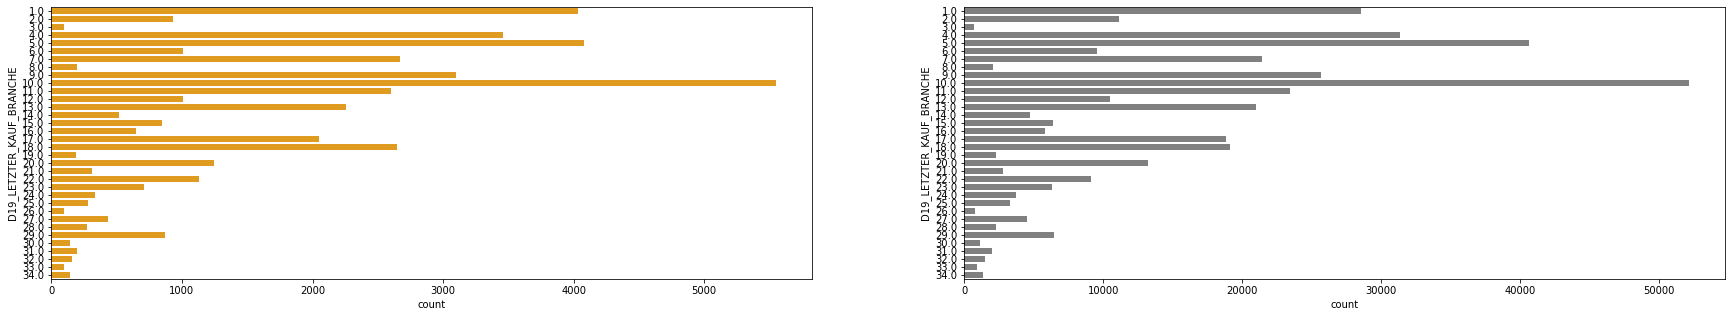

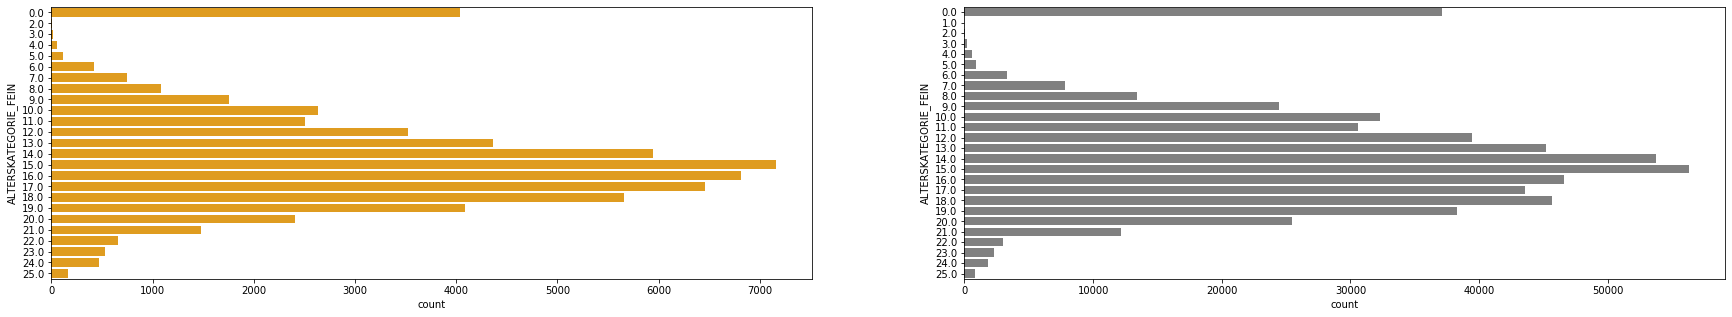

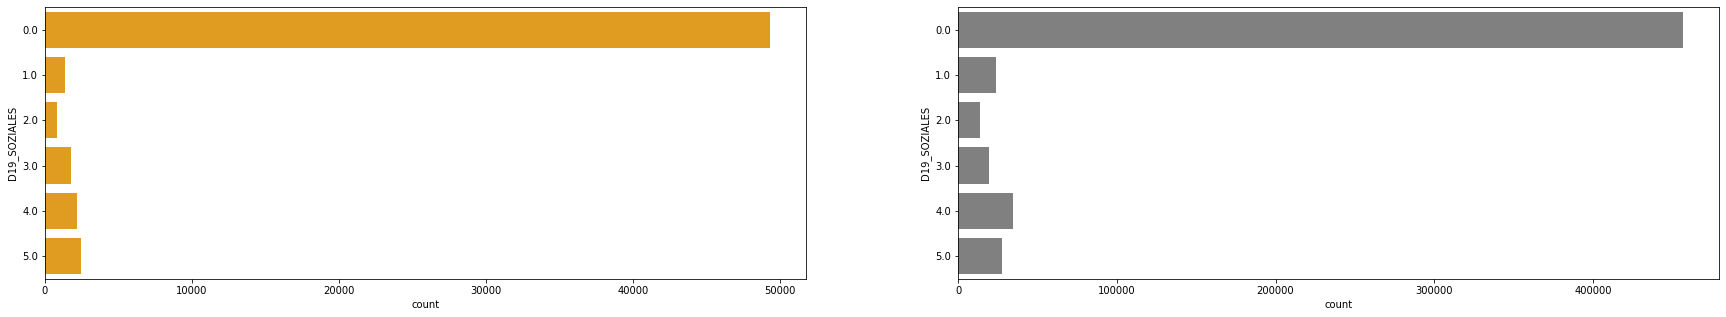

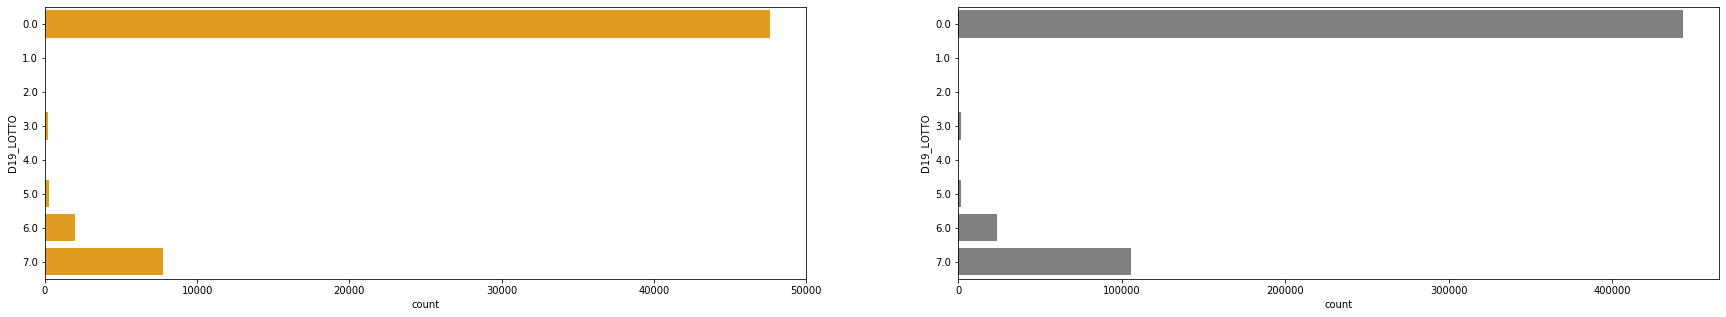

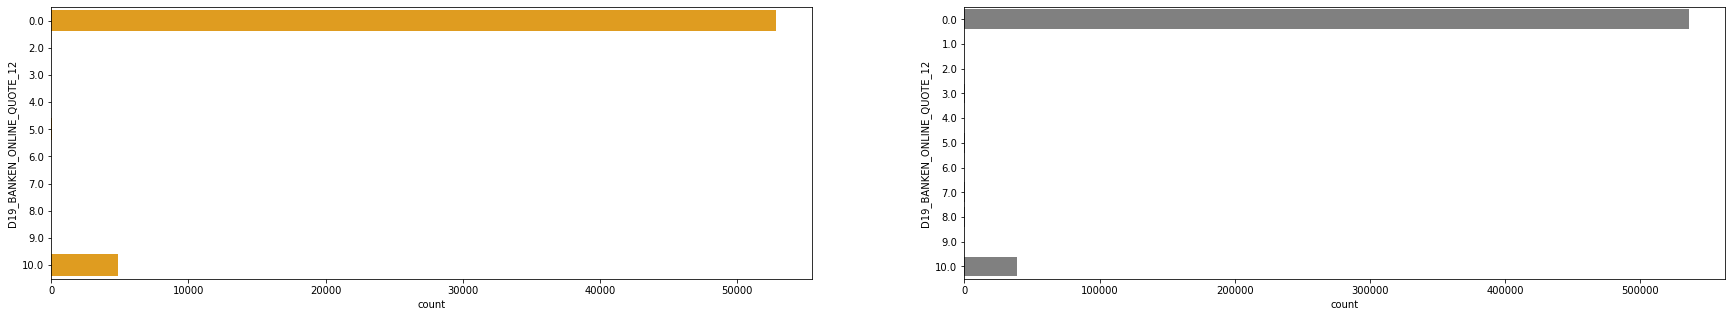

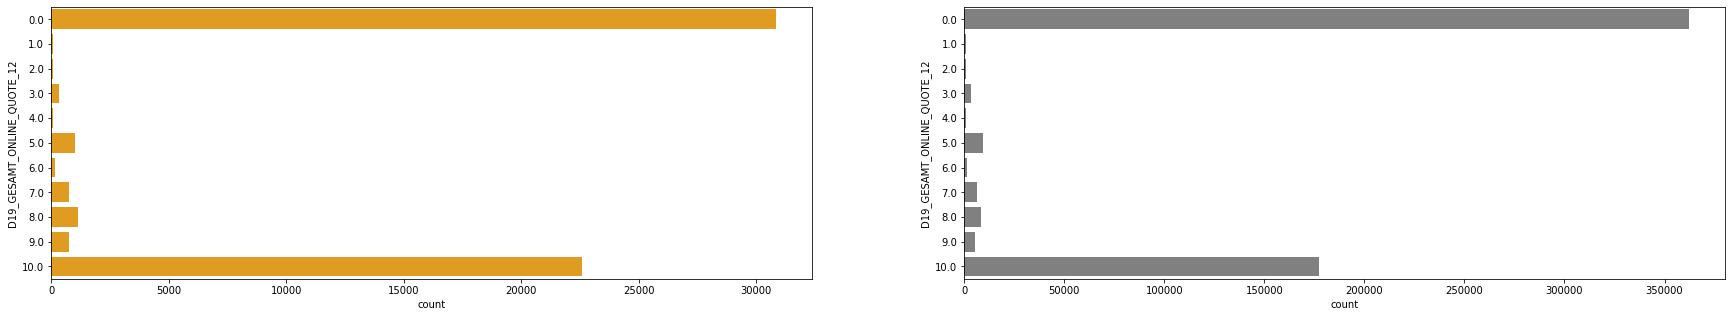

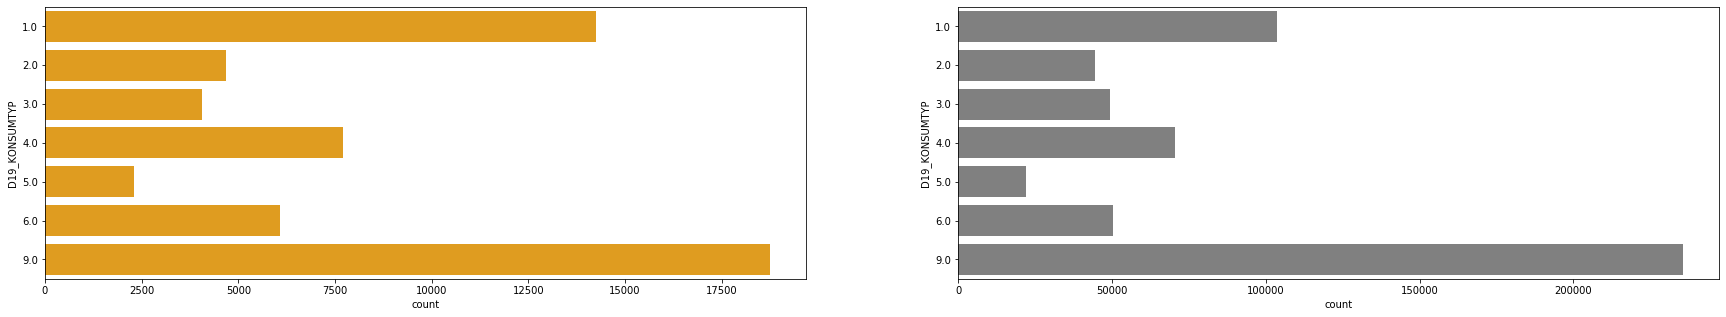

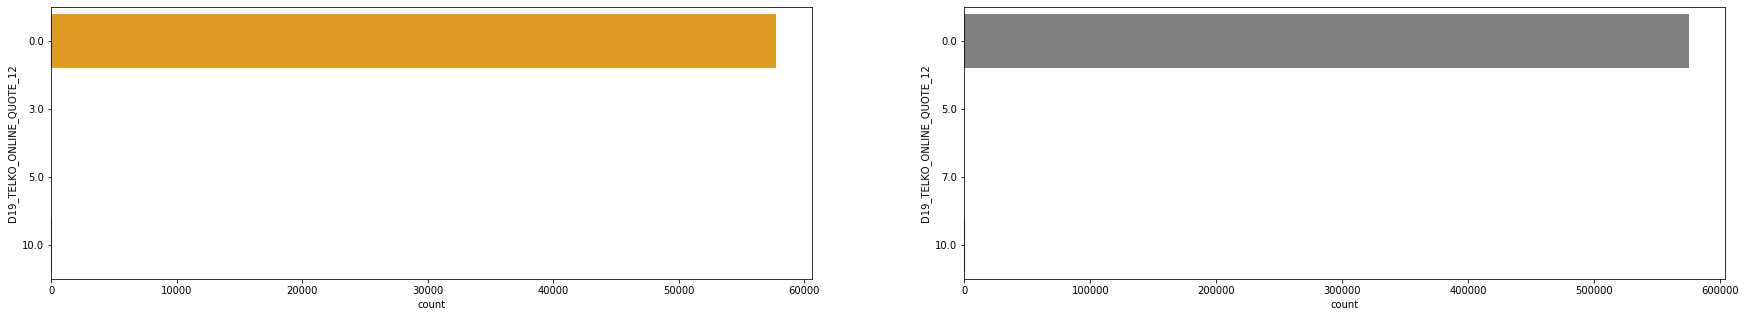

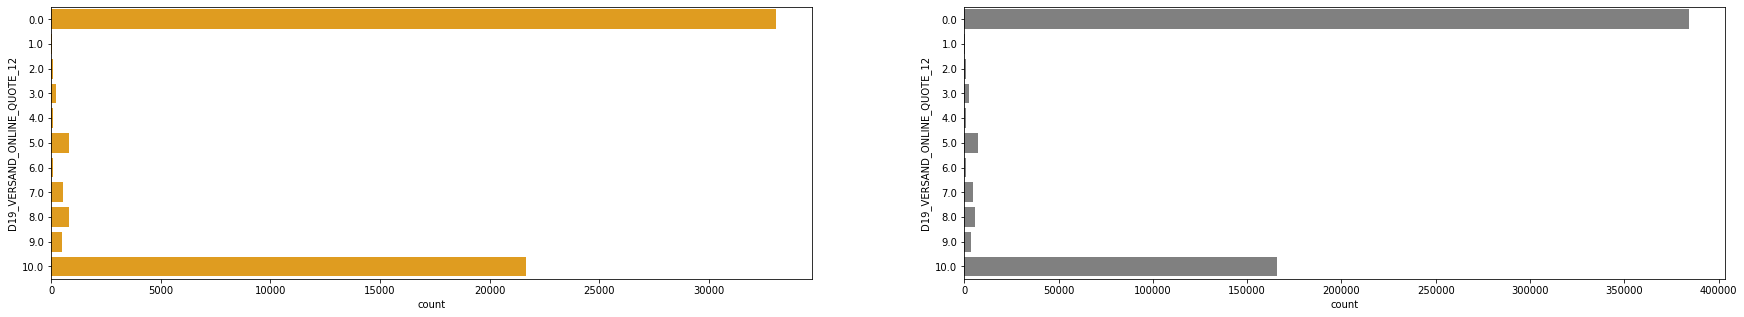

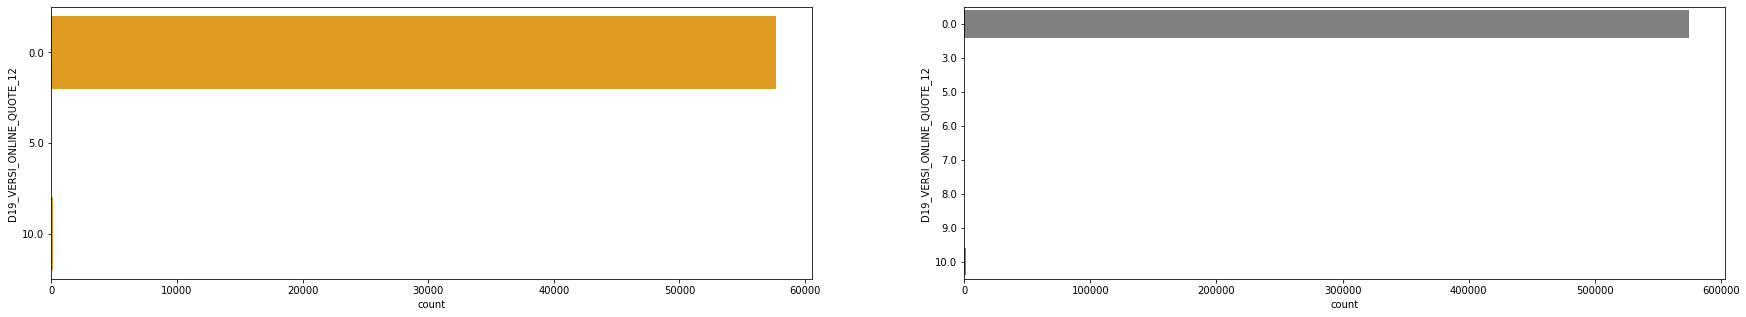

In [103]:

for high_nan in high_nans:
    compare_nan_in_rows(high_nan, 'orange', 'grey')

In [104]:
# define as 'low_nans' the 10 features above the 5% cutoff and compare the nan distributions in rows
low_nans = list(nas_5.iloc[-9:,:].index)
print(low_nans)

['UNGLEICHENN_FLAG', 'VHA', 'ANZ_KINDER', 'WOHNDAUER_2008', 'SOHO_KZ', 'AKT_DAT_KL', 'EINGEZOGENAM_HH_JAHR', 'KONSUMNAEHE', 'RT_UEBERGROESSE']


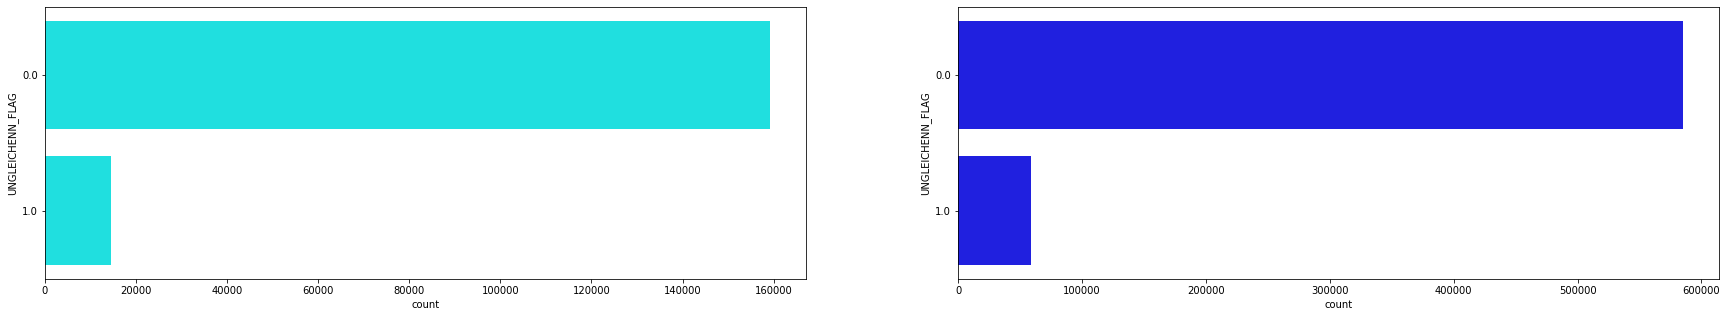

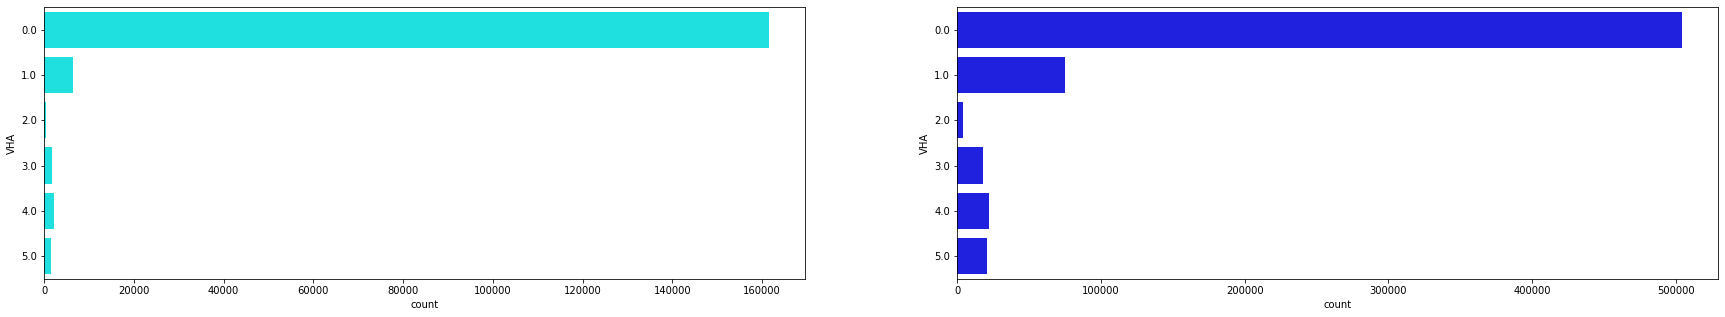

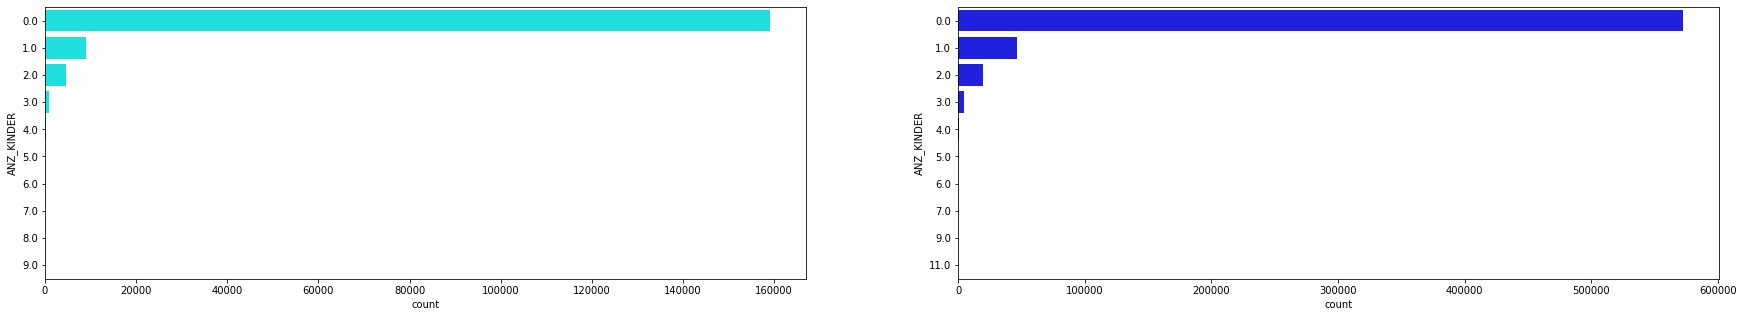

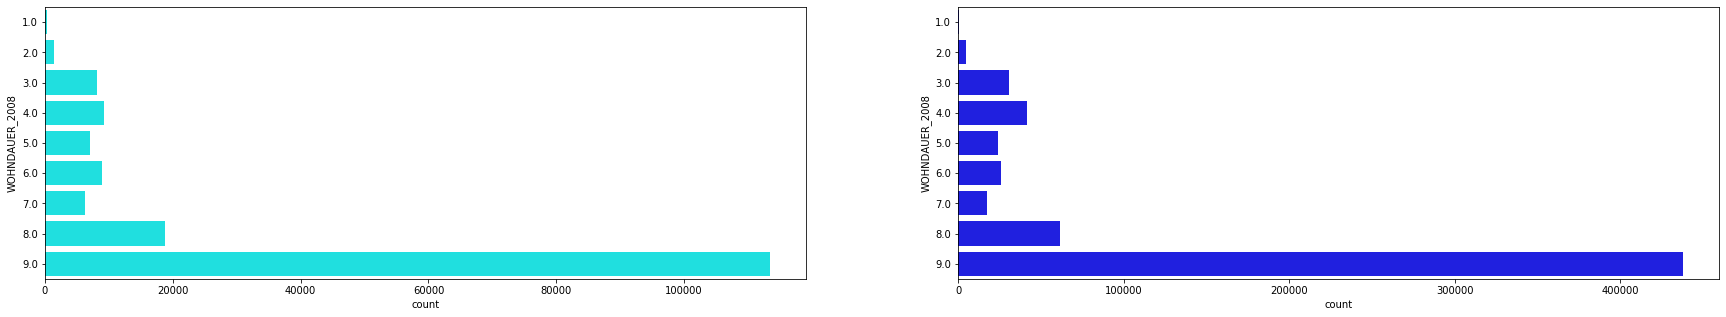

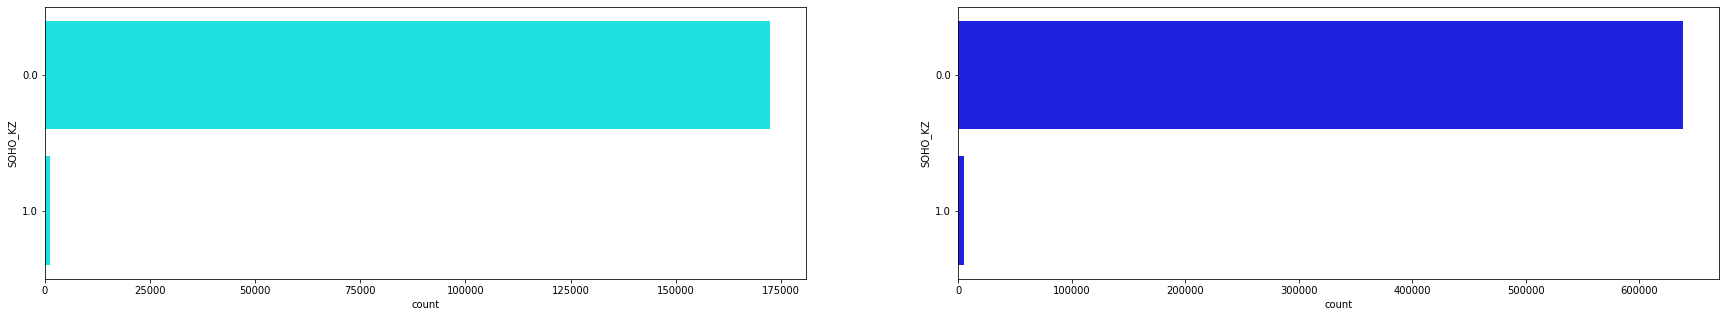

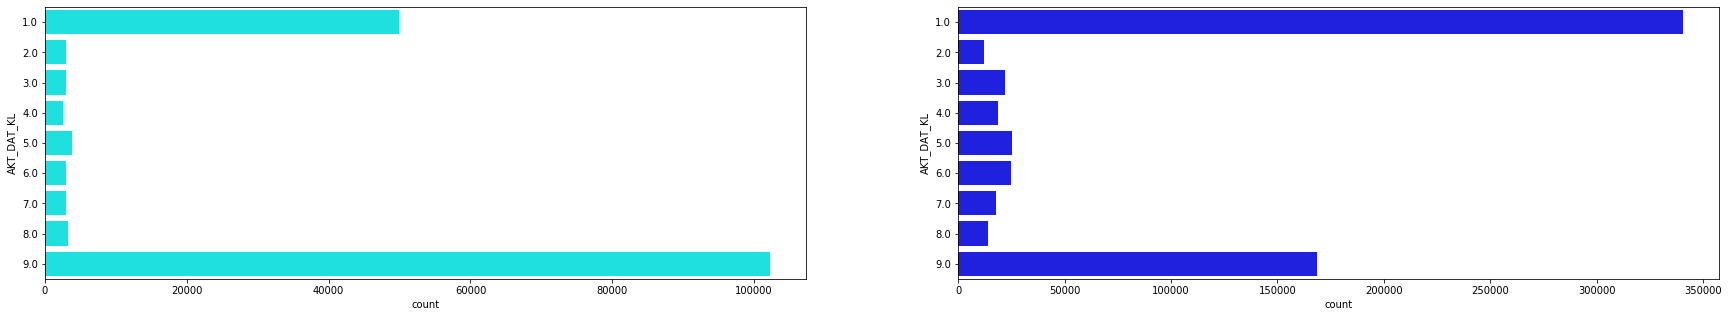

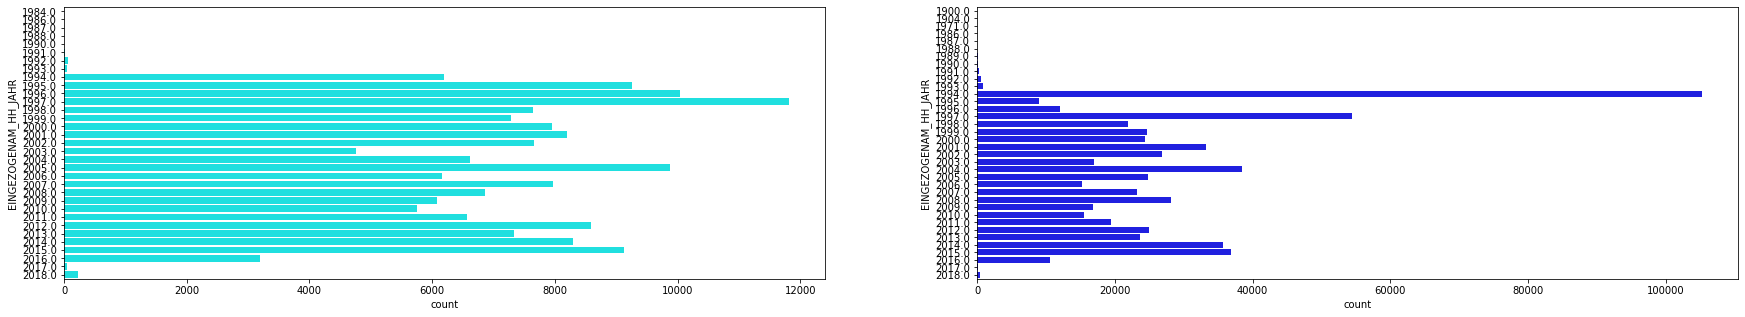

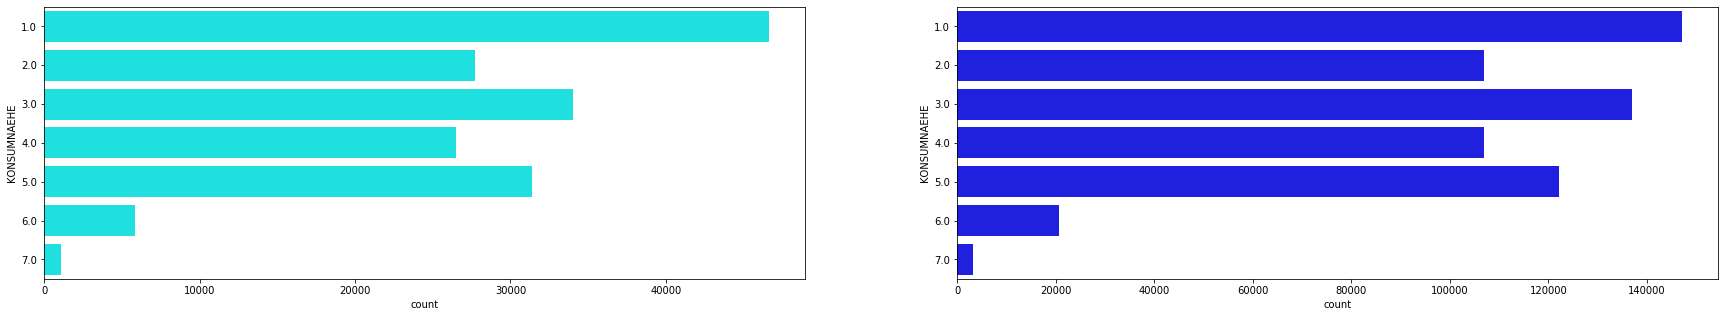

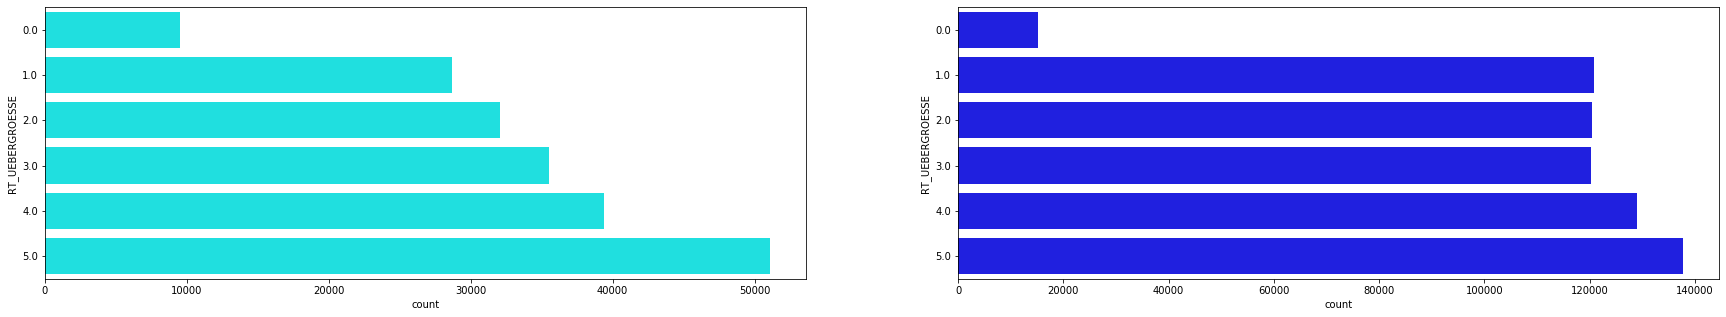

In [105]:
# compare the distributions in rows
for low_nan in low_nans:
    compare_nan_in_rows(low_nan, 'cyan', 'blue')

**Discussion**

This visual comparison of the data in the subset of rows containing 10% or more missing values with those of the subset of rows with fewer than 10% missing values shows that the distributions are similar.  Therefore, we conclude that dropping those rows from the analysis is justified, i.e., the final results should not be affected.  

In [106]:
#set azdias_sub to include only rows with fewer than 10% missing values
print(azdias_sub.shape)
print(azdias_less.shape)
azdias_sub = azdias_less
print(azdias_sub.shape)

(891221, 360)
(644077, 360)
(644077, 360)


**Dealing with 'Unknown/missing' codes**

We have a file specifying the feature types (e.g, categorical, numerical) and codes for 
missing or unknown data.  The data were inferred from the spreadsheets provided:
DIAS Attributes - Values 2017 and DIAS Information Levels - Attributes 2017.

In [107]:
# read variable_info.csv.

df_info = pd.read_csv('variable_info.csv')
print(df_info.shape)
df_info.head()

(313, 4)


,Attribute,Description,Type,missing_or_unknown
0,AGER_TYP,best-ager typology,categorical,[-1]
1,ALTERSKATEGORIE_GROB,age through prename analysis,ordinal,"[-1,0]"
2,ANREDE_KZ,gender,categorical,"[-1,0]"
3,CJT_GESAMTTYP,Customer-Journey-Typology relating to the pref...,categorical,[0]
4,FINANZ_MINIMALIST,financial typology: low financial interest,ordinal,[-1]


In [108]:
# Summarize feature types
def find_variable_types(type):
    var = df_info.loc[df_info['Type'] == type, 'Attribute'].values
    print("Number of {} features: {}".format(type, var.shape[0]))
    return var
num_types = find_variable_types('numeric')
ord_types = find_variable_types('ordinal')
mix_types = find_variable_types('mixed')
cat_types = find_variable_types('categorical')


Number of numeric features: 7
Number of ordinal features: 272
Number of mixed features: 8
Number of categorical features: 26


**Note**

`df_info` provides type information for some, but not all the features included in `azdias`.  It also provides information on some features not included in `azdias`.  In other words, a subset of the indices of `df_info` matches a subset of the columns of `azdias`--the "common" features. The `df_info` indices not included in "common" are unique to `df_info`, while the `azdias` columns not included in "common" are unique to `azdias`. The former can be removed as they are not germane to the analysis.  The latter have to be investigated further.


In [109]:
# identify the overlap between df_info and azdias_sub
common = np.intersect1d(list(df_info['Attribute']), list(azdias_sub.columns))

# identify the features unique to df_info
delta1 = np.setdiff1d(list(df_info['Attribute']), list(azdias_sub.columns), assume_unique=True)

# identify the features unique to azdias_sub
delta2 = np.setdiff1d(list(azdias_sub.columns), list(df_info['Attribute']), assume_unique=True)

print("common part", len(common))
print("delta1: ", len(delta1))
print("delta2: ", len(delta2))


common part 264
delta1:  49
delta2:  96


In the following, we will review the 89 features for which we were not explicitly provided type information, retain those we understand, and discard the rest.

In [110]:
# remove the df_info rows not needed
common_idxs = df_info.index[df_info['Attribute'].isin(azdias_sub.columns)]
df_info = df_info.loc[common_idxs,:]
print(df_info.shape)

(264, 4)


In [111]:
# create a "to-do list" of the features to be investigatd
# remove the features from the list incrementally

tbd_cols = azdias_sub.drop(common, axis=1)
print(tbd_cols.shape)
tbd_cols.columns

(644077, 96)


Index(['LNR', 'AKT_DAT_KL', 'ALTERSKATEGORIE_FEIN', 'ANZ_KINDER',
       'ANZ_STATISTISCHE_HAUSHALTE', 'CAMEO_INTL_2015', 'CJT_KATALOGNUTZER',
       'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 'CJT_TYP_5',
       'CJT_TYP_6', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24',
       'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST',
       'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
       'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_HANDWERK',
       'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP_MAX',
       'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LETZTER_KAUF_BRANCHE',
       'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN',
       'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_SOZIALES',
       'D19_TECHNIK', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24',
       'D19_TELKO_MOBILE

In [112]:
# features with DA19_ and KBA13 prefix in df_info were of the ordinal type, 
#so we can assume this is true for the cols above.
# drop these columns from further investigation.

temp = ['D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24',
       'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL',
       'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST',
       'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
       'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN',
       'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_HANDWERK',
       'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KONSUMTYP_MAX',
       'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LETZTER_KAUF_BRANCHE',
       'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER', 'D19_REISEN',
       'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_SOZIALES',
       'D19_TECHNIK', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24',
       'D19_TELKO_MOBILE', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_TELKO_REST',
       'D19_TIERARTIKEL', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24',
       'D19_VERSAND_REST', 'D19_VERSI_ANZ_12', 'D19_VERSI_ANZ_24',
       'D19_VERSI_ONLINE_QUOTE_12', 'D19_VERSICHERUNGEN', 'D19_VOLLSORTIMENT',
       'D19_WEIN_FEINKOST',]

tbd_cols.drop(temp, axis=1, inplace=True)

In [113]:
temp = ['KBA13_ANTG1','KBA13_ANTG2', 'KBA13_ANTG3', 'KBA13_ANTG4', 'KBA13_BAUMAX',
       'KBA13_CCM_1401_2500', 'KBA13_CCM_3000', 'KBA13_CCM_3001', 'KBA13_GBZ',
       'KBA13_HHZ', 'KBA13_KMH_210',]

tbd_cols.drop(temp, axis=1, inplace=True)

In [114]:
# The 'FLAG' features are binary, so they need no further treatment
tbd_cols.drop(['DSL_FLAG','HH_DELTA_FLAG', 'UNGLEICHENN_FLAG'], axis=1, inplace=True)


In [115]:
# by inspection, we see that the CJT_* features are ordinal, so they can stay as is.
tbd_cols.drop(['CJT_KATALOGNUTZER','CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3', 'CJT_TYP_4', 
               'CJT_TYP_5','CJT_TYP_6', ], axis=1, inplace=True)


In [116]:
# other ordinal- or binary-type features: AKT_DAT_KL, FIRMENDICHTE, KOMBIALTER, KONSUMZELLE, MOBI_RASTER,
# RT_KEIN_ANREIZ, RT_SCHNAEPPCHEN, RT_UEBERGROESSE, SOHO_KZ, STRUKTURTYP, UMFELD_ALT,
# VHA, VHN, VK_DHT4A
tbd_cols.drop([ 'AKT_DAT_KL', 'ANZ_KINDER', 'FIRMENDICHTE', 'KOMBIALTER', 'KONSUMZELLE', 'MOBI_RASTER',
    'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN', 'RT_UEBERGROESSE', 'SOHO_KZ', 'STRUKTURTYP', 
    'UMFELD_ALT','UMFELD_JUNG', 'VHA', 'VHN', 'VK_DHT4A'], axis=1, inplace=True)

In [117]:
# what is left is tbd_cols
tbd_cols.head()

,LNR,ALTERSKATEGORIE_FEIN,ANZ_STATISTISCHE_HAUSHALTE,CAMEO_INTL_2015,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,GEMEINDETYP,VERDICHTUNGSRAUM,VK_DISTANZ,VK_ZG11
1,910220,21.0,12.0,51.0,1992.0,2004.0,22.0,0.0,11.0,10.0
2,910225,17.0,7.0,24.0,1992.0,2000.0,22.0,1.0,9.0,6.0
3,910226,13.0,2.0,12.0,1997.0,1998.0,40.0,0.0,10.0,11.0
4,910241,14.0,3.0,43.0,1992.0,2004.0,21.0,1.0,5.0,4.0
5,910244,10.0,2.0,54.0,1992.0,1994.0,40.0,0.0,7.0,4.0


 In short:  
  * Retaining all obvious ordinal or binary categorical
  * dropping GEMEINDETYP, VERDICHTUNGSRAUM because the variable type is unclear.  For example, GEMEINDETYP may describe the type of community, which would be categorical.  But the high numerical values hint at a multi-level variable, which we cannot handle without more information.
  * also dropping VK_DISTANZ and VK_ZG11 for similar reasons.
  * the timestamp in EINGEFUEGT_AM will be dealt with later.
  * 'CAMEO_INTL_2015' also will have to be handled separately
  * LNR is a customer id: remove from azdias_sub
  * Not sure of the type of ALTERSKATEGORIE_FEIN	ANZ_STATISTISCHE_HAUSHALTE: remove from the analysis
  

In [118]:

cats_to_drop = ['LNR', 'ALTERSKATEGORIE_FEIN', 'ANZ_STATISTISCHE_HAUSHALTE', 
                 'GEMEINDETYP','VERDICHTUNGSRAUM','VK_DISTANZ','VK_ZG11' ]

azdias_sub.drop(cats_to_drop, axis=1, inplace=True)

**Now dealing with categorical features**

In [119]:
# Update the list of categorical features, cat_types, based on above work

cat_types = list(np.intersect1d(cat_types, azdias_sub.columns))
cat_types.append('CAMEO_INTL_2015')
print(len(cat_types))
print(cat_types)

21
['AGER_TYP', 'ANREDE_KZ', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CJT_GESAMTTYP', 'D19_KONSUMTYP', 'FINANZTYP', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'OST_WEST_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP', 'CAMEO_INTL_2015']


  * Of the 21 features above, 4 are binary: ANREDE_KZ, GREEN_AVANTGARDE, OST_WEST_KZ, and VERS_TYP. We need to change letters to numbers in OST_WEST_KZ; otherwise, no further treatment is needed.
  * The remaining 18 features are categorical.  The corresponding columns in azdias will be expanded to represent the various categories, after taking care of the special situations noted below.
  * LP_FAMILIE_GROB and LP_STATUS_GROB use 3 values for the same indicator.  For example, 'single parent' is coded 3, 4, or 5. There is no degree of being a single parent, so these distinctions are meaningless; these codes need to be combined.
  * The two levels in CAMEO_INTL_2015 will be extracted before expansion.


In [120]:
# OST_WEST_KZ
azdias_sub['OST_WEST_KZ'] = azdias_sub['OST_WEST_KZ'].replace(['O', 'W'], [0, 1])

In [121]:
# 'LP_FAMILIE_GROB' 'LP_STATUS_GROB'.  
#No reason why the same characteristic should have different codes
azdias_sub['LP_FAMILIE_GROB'] = azdias_sub['LP_FAMILIE_GROB'].replace([3, 5], 4)
azdias_sub['LP_FAMILIE_GROB'] = azdias_sub['LP_FAMILIE_GROB'].replace([6, 8], 7)
azdias_sub['LP_FAMILIE_GROB'] = azdias_sub['LP_FAMILIE_GROB'].replace([9, 11], 4)

In [122]:
azdias_sub['LP_STATUS_GROB'] = azdias_sub['LP_STATUS_GROB'].replace([2, 7, 9], [1, 6, 8])
azdias_sub['LP_STATUS_GROB'] = azdias_sub['LP_STATUS_GROB'].replace([3, 5], 4)

In [123]:
# Before expanding the categorical columns, replace missing/unkown codes with NaN
def replace_unk_with_nan(df, df_info):
    for index in df_info.index:

        s = df_info.loc[index,'missing_or_unknown']
        for item in s:
            try:
                df_info.loc[index,'missing_or_unknown'][item] = int(df_info.loc[index,'missing_or_unknown'][item])
            except:
                continue
        try:    
            df.loc[:,(df_info.loc[index, 'Attribute'])].replace(df_info.loc[index,'missing_or_unknown'], np.NaN, inplace=True)
        except:
            continue
            
    return df

In [124]:
# Find and remove the XX as unkown indicators (they are problematic)
def remove_XX(df):
    for col in df.columns:
        findXX = df[col].isin(['XX', 'X']).sum()
        if findXX > 0:
            print(col, findXX)
            df[col] = df[col].replace(['XX', 'X'], np.NaN)
            # check
            findXX = df[col].isin(['XX', 'X']).sum()
            print(col, findXX)
    return df
            

In [125]:
azdias_sub = remove_XX(azdias_sub)
azdias_sub = replace_unk_with_nan(azdias_sub, df_info)
print("Replaced missing or unknowns in azdias_sub ")

# for features not included in df_info, assume -1 always represents a missing or unknown
azdias_sub = azdias_sub.replace([-1, '-1'], np.NaN )

CAMEO_DEU_2015 262
CAMEO_DEU_2015 0
CAMEO_DEUG_2015 262
CAMEO_DEUG_2015 0
CAMEO_INTL_2015 262
CAMEO_INTL_2015 0
Replaced missing or unknowns in azdias_sub 


In [126]:
# Now we use get_dummies to add columns representing the various categories
azdias_go = azdias_sub

# re-encode the categorical variables (21 - 4 (binary) - CAMEO_INTL_2015 (later)):
cats_to_dummy = ['AGER_TYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CJT_GESAMTTYP', 
                 'D19_KONSUMTYP', 'FINANZTYP', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 
                 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB','LP_STATUS_FEIN', 'LP_STATUS_GROB',
                 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP']

def transform_multi_values_cat(feat):
    cols = pd.get_dummies(azdias_go[feat], prefix=feat)
    return cols

# add new column to the data frame
for item in cats_to_dummy:
    new_cols = transform_multi_values_cat(item)
    azdias_go = pd.concat([azdias_go, new_cols], axis=1)

print("Dummied ", len(cats_to_dummy), " multi-value categorical variables.")   

azdias_go.drop(cats_to_dummy, axis=1, inplace=True)

print("Removed redundant columns ",azdias_go.shape)

Dummied  16  multi-value categorical variables.
Removed redundant columns  (644077, 488)


**About CAMEO_INTL_2015**

There are five levels for wealth (the first digit) and five levels for the life stage (the second digit), namely:
  * Wealthy: 11-15
  * Prosperous: 21-25
  * Comfortable: 31-35
  * Less affluent: 41-45
  * Poorer: 51-55


  * Pre-Family Couples & Singles (11, 21, 31, 41, 51)
  * Young Couples With Children (12, 22, 32, 42, 52)
  * Families With School Age Children (13, 23, 33, 43, 53)
  * Older Families & Mature Couples (14, 24, 34, 44, 54)
  * Elders In Retirement (15, 25, 35, 45, 55)

**Step 1:**
  - Copy "CAMEO_INTL_2015" to a new column: "CAMEO_wealth"
  - Replace (11-55) with the appropriate weath indicator (a number between 1 and 5 (1=poorer, 5=wealthy)
  - Copy "CAMEO_INTL_2015" to a new column "CAMEO_life"
  - Replace (11-55) with the appropriate life-stage indicator (a number between 1 and 5 (1=younger, 5=older)


**Step 2:**
  - Append "CAMEO_wealth" column to capture the wealth level
  - Append "CAMDEO_life" column to capture life stage


**Step 3:**
Remove "CAMEO_INTL_2015"

In [127]:
# create two new columns
CAMEO_wealth = pd.Series(azdias_go['CAMEO_INTL_2015'], name= 'CAMEO_wealth')
CAMEO_life = pd.Series(azdias_go['CAMEO_INTL_2015'], name= 'CAMEO_life')

# replace codes
wealth = [['11', '12', '13', '14', '15'], 
          ['21', '22', '23', '24', '25'],
          ['31', '32', '33', '34', '35'], 
          ['41', '42', '43', '44', '45'],
          ['51', '52', '53', '54', '55']] 

life = [['11', '21', '31', '41', '51'],
       ['12', '22', '32', '42', '52'], 
       ['13', '23', '33', '43', '53'],
       ['14', '24', '34', '44', '54'],
       ['15', '25', '35', '45', '55']]

def replace_codes(s,item, k):
    s = s.replace(item, k)
    return s

k = 5
for item in wealth:
    CAMEO_wealth = replace_codes(CAMEO_wealth, item, k)
    k = k - 1

k = 1
for item in life:
    CAMEO_life = replace_codes(CAMEO_life, item, k)
    k +=1

azdias_go = pd.concat([azdias_go, CAMEO_wealth, CAMEO_life], axis = 1)
print("Replaced 'CAMEO_INTL_2015' with two new variables: ", azdias_go.shape)          

#drop "CAMEO_INTL_2015"
azdias_go = azdias_go.drop("CAMEO_INTL_2015", axis=1) 
print("Dropped 'CAMEO_INTL_2015': ", azdias_go.shape)
print("\n", azdias_go.columns)

Replaced 'CAMEO_INTL_2015' with two new variables:  (644077, 490)
Dropped 'CAMEO_INTL_2015':  (644077, 489)

 Index(['AKT_DAT_KL', 'ALTER_HH', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       'ANZ_KINDER', 'ANZ_PERSONEN', 'ANZ_TITEL', 'ARBEIT', 'BALLRAUM',
       'CJT_KATALOGNUTZER',
       ...
       'TITEL_KZ_4.0', 'TITEL_KZ_5.0', 'ZABEOTYP_1', 'ZABEOTYP_2',
       'ZABEOTYP_3', 'ZABEOTYP_4', 'ZABEOTYP_5', 'ZABEOTYP_6', 'CAMEO_wealth',
       'CAMEO_life'],
      dtype='object', length=489)


In [128]:
# make all int in the CAMEO_wealth and CAMEO_type
azdias_go['CAMEO_wealth'] = azdias_go['CAMEO_wealth'].replace(' ', np.NaN)
azdias_go['CAMEO_life'] = azdias_go['CAMEO_life'].replace(' ', np.NaN)

**About PRAEGENDE_JUGENDJAHRE**

The "Mainstream" label corresoponds to codes (1, 3, 5, 8, 10, 12, 14).

The "Avant-Garde" label corresponds to codes (2, 4, 6, 7, 9, 11, 13, 15).


**Step 1:**
  * Copy "PRAEGENDE_JUGENDJAHRE" to a new column: "PR_J_mvt"
  * Replace (1, 3, 5, 8, 10, 12, 14) with (0) i.e., mainstream indicator
  * Replace ((2, 4, 6, 7, 9, 11, 13, 15) with (1) i.e., avant-garde indicator
  * Copy "PRAEGENDE_JUGENDJAHRE" to a new column "PR_J_gen"
  * Replace each group of two successsive codes with a single age indicator, e.g., :
    * (1, 2) --> 1, 1
    * (3, 4) --> 2, 2

**Step 2:**
  * Append 'PR_J_Movement" column to capture Mainstream vs. Avant-Garde
  * Append "PR_J_Gen" column to capture decade
  
**Step 3:**

Remove "PRAEGENDE_JUGENDJAHRE"


In [129]:
# Similarly for "PRAEGENDE_JUGENDJAHRE"

# create two new columns
PR_J_mvt = pd.Series(azdias_go['PRAEGENDE_JUGENDJAHRE'], name='PR_J_mvt')
PR_J_gen = pd.Series(azdias_go['PRAEGENDE_JUGENDJAHRE'], name='PR_J_gen')

# replace codes
PR_J_mvt = PR_J_mvt.replace([1, 3, 5, 8, 10, 12, 14], 0)
PR_J_mvt = PR_J_mvt.replace ([2, 4, 6, 7, 9, 11, 13, 15], 1)

PR_J_gen = PR_J_gen.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                 [1, 1, 2, 2, 3, 3, 3, 4, 4, 6, 6, 6, 6, 7, 7])

azdias_go = pd.concat([azdias_go, PR_J_mvt, PR_J_gen ], axis = 1)
print("Replaced 'PRAEGENDE_JUGENDJAHRE' with two new variables: ", azdias_go.shape)
          
#drop "PRAEGENDE_JUGENDJAHRE
azdias_go = azdias_go.drop("PRAEGENDE_JUGENDJAHRE", axis=1)
print("Dropped 'PRAEGENDE_JUGENDJAHRE': ", azdias_go.shape)
print("\n", azdias_go.columns)

Replaced 'PRAEGENDE_JUGENDJAHRE' with two new variables:  (644077, 491)
Dropped 'PRAEGENDE_JUGENDJAHRE':  (644077, 490)

 Index(['AKT_DAT_KL', 'ALTER_HH', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL',
       'ANZ_KINDER', 'ANZ_PERSONEN', 'ANZ_TITEL', 'ARBEIT', 'BALLRAUM',
       'CJT_KATALOGNUTZER',
       ...
       'ZABEOTYP_1', 'ZABEOTYP_2', 'ZABEOTYP_3', 'ZABEOTYP_4', 'ZABEOTYP_5',
       'ZABEOTYP_6', 'CAMEO_wealth', 'CAMEO_life', 'PR_J_mvt', 'PR_J_gen'],
      dtype='object', length=490)


In [130]:
# for reference
print(cats_to_dummy)

['AGER_TYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CJT_GESAMTTYP', 'D19_KONSUMTYP', 'FINANZTYP', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP']


**Finally*

Create a function to apply to the customer and mailout data the same cleaning operations applied to the demographic data (azdias).

In [131]:
def clean_data(df, outliers, cats_to_dummy, cats_to_drop, wealth, life):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    INPUT: 
    df - Customers DataFrame
    outliers - columns to remove (list)
    cats_to_dummy - categorical features to dummy (list)
    cats_to_drop - categorical features to drop (list)
    wealth, life - lists to convert multi-level variables
    
    OUTPUT: Trimmed and cleaned DataFrame
    """
    
    # Convert missing codes to NaNs:
    df = remove_XX(df)
    df = replace_unk_with_nan(df, df_info)
    # replace possible -1 with NaN
    df = df.replace([-1, '-1', 'X', 'XX'], np.NaN)
    
    ## Remove the outlier columns
    df.drop(outliers, axis='columns', inplace=True)
    print("Outliers dropped: ", df.shape)

    ## Check NaNs in columns:
    na_in_cols = df.isnull().sum().hist(bins=20)
    plt.show()
    
    ## Check NaNs in rows:
    na_in_rows = df.isnull().sum(axis=1).hist(bins=20)
    plt.show()
    
    # update the D19_LETZTER_KAUF_BRANCHE' column
    for key in LETZTER_KB_dict.keys():
         df['D19_LETZTER_KAUF_BRANCHE'] = df['D19_LETZTER_KAUF_BRANCHE'].replace(key, LETZTER_KB_dict[key])
       
    # pick the year in 'EINGEFUEGT_AM'
    temp = df['EINGEFUEGT_AM'].str.split('-')
    temp_np = np.array(temp)
    year = []
    for item in temp_np:
        try:  
            year.append(int(item[0]))
        except:
            year.append(np.NaN)
    df['EINGEFUEGT_AM'] = year
       
    # select, re-encode, and engineer column values.
    # re-incode 'OST_WEST_KZ' (binary with non-numeric values)
    df['OST_WEST_KZ'] = pd.get_dummies(df['OST_WEST_KZ'])
    
    print("Dummied 'OST_WEST_KZ': ", df.shape)
    
    # same with 'CUSTOMER_GROUP' (not included in the general pop data)
    try:
        df['CUSTOMER_GROUP']= df['CUSTOMER_GROUP'].replace(['MULTI_BUYER', 'SINGLE_BUYER'], [2, 1])
        df['CUSTOMER_GROUP'] = pd.get_dummies(df['CUSTOMER_GROUP'])
    
        print("Dummied 'CUSTOMER_GROUP': ", df.shape)
    except:
        pass
    
    # combine codes in 'LP_FAMILIE_GROB' 'LP_STATUS_GROB'.  
    df['LP_FAMILIE_GROB'] = df['LP_FAMILIE_GROB'].replace([3, 5], 4)
    df['LP_FAMILIE_GROB'] = df['LP_FAMILIE_GROB'].replace([6, 8], 7)
    df['LP_FAMILIE_GROB'] = df['LP_FAMILIE_GROB'].replace([9, 11], 4)
    df['LP_STATUS_GROB'] = df['LP_STATUS_GROB'].replace([2, 7, 9], [1, 6, 8])
    df['LP_STATUS_GROB'] = df['LP_STATUS_GROB'].replace([3, 5], 4)
        
    # add new column to the data frame
    for item in cats_to_dummy:
        new_cols = pd.get_dummies(df[item], prefix=item)
        df = pd.concat([df, new_cols], axis=1)

    print("Dummied ", len(cats_to_dummy), "multi-value categorial variables: ", df.shape)   
    # drop the old categorical columns
    df.drop(cats_to_dummy, axis=1, inplace=True)
    df.drop(cats_to_drop, axis=1, inplace=True)
    print("Removed redundant and dropped columns: ", df.shape)
       
    # engineer two new variables for "CAMEO_INTL_2015"
    CAMEO_wealth = pd.Series(df['CAMEO_INTL_2015'], name= 'CAMEO_wealth')
    CAMEO_life = pd.Series(df['CAMEO_INTL_2015'], name= 'CAMEO_life')

    # replace codes
    k = 5
    for item in wealth:
        CAMEO_wealth = replace_codes(CAMEO_wealth, item, k)
        k = k - 1

    k = 1
    for item in life:
        CAMEO_life = replace_codes(CAMEO_life, item, k)
        k +=1

    
    df = pd.concat([df, CAMEO_wealth, CAMEO_life], axis = 1)
    # make all int in the CAMEO_wealth and CAMEO_type
    df['CAMEO_wealth'] = df['CAMEO_wealth'].replace(' ', np.NaN)
    df['CAMEO_life'] = df['CAMEO_life'].replace(' ', np.NaN)
          
    #drop "CAMEO_INTL_2015"
    df = df.drop("CAMEO_INTL_2015", axis=1) 
    print("Replaced and dropped 'CAMEO_INTL_2015' : ", df.shape)
    
    # replace "PRAEGENDE_JUGENDJAHRE" wiith two new variables.
    # create two new columns
    PR_J_mvt = pd.Series(df['PRAEGENDE_JUGENDJAHRE'], name='PR_J_mvt')
    PR_J_gen = pd.Series(df['PRAEGENDE_JUGENDJAHRE'], name='PR_J_gen')

    # replace codes
    PR_J_mvt = PR_J_mvt.replace([1, 3, 5, 8, 10, 12, 14], 0)
    PR_J_mvt = PR_J_mvt.replace ([2, 4, 6, 7, 9, 11, 13, 15], 1)

    PR_J_gen = PR_J_gen.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
                 [1, 1, 2, 2, 3, 3, 3, 4, 4, 6, 6, 6, 6, 7, 7])

    df = pd.concat([df, PR_J_mvt, PR_J_gen ], axis = 1)     
    #drop "PRAEGENDE_JUGENDJAHRE
    df = df.drop("PRAEGENDE_JUGENDJAHRE", axis=1)
    print("Replaced and dropped 'PRAEGENDE_JUGENDJAHRE': ", df.shape)
    
    # Return the cleaned dataframe.
    return df


In [132]:
# Apply the cleaning operations to the customer dataset
# add 'PRODUCT_GROUP'feature to cats_to_dummy

customers['PRODUCT_GROUP'] = customers['PRODUCT_GROUP'].replace(['COSMETIC_AND_FOOD', 'FOOD', 'COSMETIC'], [3, 2, 1])
cats_to_dummy.append('PRODUCT_GROUP')
print(cats_to_dummy)

['AGER_TYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CJT_GESAMTTYP', 'D19_KONSUMTYP', 'FINANZTYP', 'GEBAEUDETYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'TITEL_KZ', 'ZABEOTYP', 'PRODUCT_GROUP']


In [133]:
# keep customer ids 
cust_ids = customers['LNR'].to_csv('customers_ids.csv')

CAMEO_DEU_2015 126
CAMEO_DEU_2015 0
CAMEO_DEUG_2015 126
CAMEO_DEUG_2015 0
CAMEO_INTL_2015 126
CAMEO_INTL_2015 0
Outliers dropped:  (191652, 363)


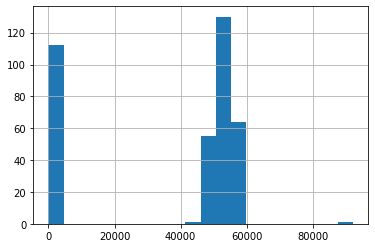

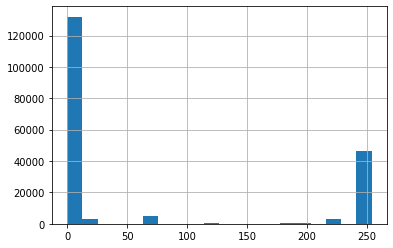

Dummied 'OST_WEST_KZ':  (191652, 363)
Dummied 'CUSTOMER_GROUP':  (191652, 363)
Dummied  17 multi-value categorial variables:  (191652, 516)
Removed redundant and dropped columns:  (191652, 492)
Replaced and dropped 'CAMEO_INTL_2015' :  (191652, 493)
Replaced and dropped 'PRAEGENDE_JUGENDJAHRE':  (191652, 494)


In [134]:
customers_go = clean_data(customers, outliers, cats_to_dummy, cats_to_drop, wealth, life)

In [135]:
customers_go.shape

(191652, 494)

In [136]:
# write cleaned datasets to file
azdias_go.to_csv('azdias_go.csv')

In [137]:
customers_go.to_csv('customers_go.csv')

In [138]:
# As explained in the next notebook, we use the same process to cleanout the mailout datasets
mailout_train = pd.read_csv('project_mailout_train.csv', low_memory=False)
print(mailout_train.shape)

(42962, 367)


In [139]:
cats_to_dummy.remove('PRODUCT_GROUP')
mailout_train_ids = mailout_train['LNR'].to_csv('mailout_train_ids.csv')

CAMEO_DEU_2015 11
CAMEO_DEU_2015 0
CAMEO_DEUG_2015 11
CAMEO_DEUG_2015 0
CAMEO_INTL_2015 11
CAMEO_INTL_2015 0
Outliers dropped:  (42962, 361)


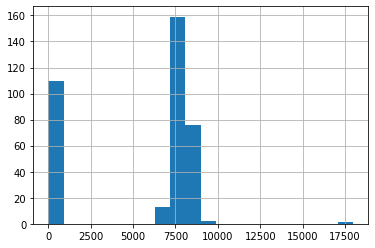

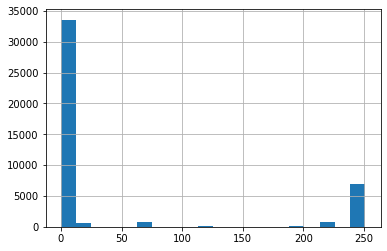

Dummied 'OST_WEST_KZ':  (42962, 361)
Dummied  16 multi-value categorial variables:  (42962, 511)
Removed redundant and dropped columns:  (42962, 488)
Replaced and dropped 'CAMEO_INTL_2015' :  (42962, 489)
Replaced and dropped 'PRAEGENDE_JUGENDJAHRE':  (42962, 490)


In [140]:
mailout_train_go = clean_data(mailout_train, outliers, cats_to_dummy, cats_to_drop, wealth, life)

In [141]:
mailout_train_go.to_csv('mailout_train_go.csv')

(42833, 366)
CAMEO_DEU_2015 7
CAMEO_DEU_2015 0
CAMEO_DEUG_2015 7
CAMEO_DEUG_2015 0
CAMEO_INTL_2015 7
CAMEO_INTL_2015 0
Outliers dropped:  (42833, 360)


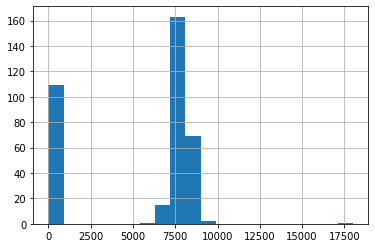

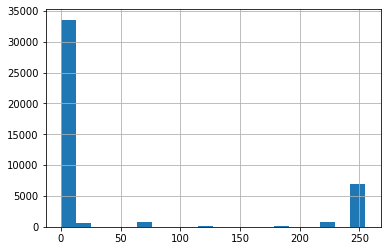

Dummied 'OST_WEST_KZ':  (42833, 360)
Dummied  16 multi-value categorial variables:  (42833, 510)
Removed redundant and dropped columns:  (42833, 487)
Replaced and dropped 'CAMEO_INTL_2015' :  (42833, 488)
Replaced and dropped 'PRAEGENDE_JUGENDJAHRE':  (42833, 489)


In [142]:
# repeat this process for mailout_test
mailout_test = pd.read_csv('project_mailout_test.csv', low_memory=False)
print(mailout_test.shape)

mailout_test_ids = mailout_test['LNR'].to_csv('mailout_test_ids.csv')

mailout_test_go = clean_data(mailout_test, outliers, cats_to_dummy, cats_to_drop, wealth, life)

mailout_test_go.to_csv('mailout_test_go.csv')

In [143]:
print(mailout_train_go.shape)
print(mailout_test_go.shape)

(42962, 490)
(42833, 489)
